In [4]:
#IMPORTANDO BIBLIOTECAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from scipy.interpolate import griddata  
import numpy.ma as ma
import folium
from folium.plugins import HeatMap
from mpltools import color
import os 
import seaborn as sns;
import math;


In [10]:
#Somente dados do Centro Oeste - 2020
pd.set_option('display.precision',2);
path = "E://Mestrado Dados Climatologicos//Historicos//Processar"
file = "E://Mestrado Dados Climatologicos//Historicos//Consolidados//2020_CO.csv"

dataframeFull = pd.DataFrame();
contador =0;
totalFiles = 114;

for x in os.listdir(path): 
    if x.endswith(".CSV"):     
        #local = path+x
        #print(local)
        meteoro_df = pd.read_csv(path+'//'+x,";",encoding='latin-1',header =8, names=['DATA', 'PRECIPITACAO','RADIACAO_GLOBAL','TEMPERATURA_MAX','TEMPERATURA_MIN','UMIDADE_MAX','UMIDADE_MIN','VENTO_VELOCIDADE'],usecols=[0,2,6,9,10,13,14,18], decimal = "." )
        meteoro_df.replace({',': '.'}, regex=True, inplace=True) ;
        meteoro_df[['PRECIPITACAO','RADIACAO_GLOBAL','TEMPERATURA_MAX','TEMPERATURA_MIN','UMIDADE_MAX','UMIDADE_MIN','VENTO_VELOCIDADE']] = meteoro_df[['PRECIPITACAO','RADIACAO_GLOBAL','TEMPERATURA_MAX','TEMPERATURA_MIN','UMIDADE_MAX','UMIDADE_MIN','VENTO_VELOCIDADE']].astype(float);
        meteoro_df['NAME_FILE'] = x;
        dataframeFull = pd.concat([dataframeFull,meteoro_df]);
        contador = contador+1;
        #print( str(contador) +' de ' + str(totalFiles));
       
    
dataframeFull.to_csv(file,index=False,sep =';');
print('Processados um total de : ' + str(contador) + ' arquivos.');

#DadosFull contem somente dados do Centro Oeste - 2020
dadosFull = pd.read_csv(file,";");  
 

Processados um total de : 114 arquivos.


In [11]:
meteoro_group2 = dadosFull.groupby(['DATA','NAME_FILE'],as_index=False).agg({'PRECIPITACAO':'sum','UMIDADE_MIN':'mean','UMIDADE_MAX':'mean','TEMPERATURA_MAX':'mean','TEMPERATURA_MIN':'mean','VENTO_VELOCIDADE':'mean','RADIACAO_GLOBAL':'mean'});
meteoro_group2.head();
meteoro_group2.to_csv("E:/Mestrado Dados Climatologicos/Historicos/Consolidados/2020_Full_Consolidados.csv",index=False,sep =';');

In [12]:
# 1001376 registros
dadosFull[dadosFull.columns[0]].count()

1001376

In [13]:
print(dadosFull.isnull().sum()) 

DATA                     0
PRECIPITACAO        348241
RADIACAO_GLOBAL     574508
TEMPERATURA_MAX     266763
TEMPERATURA_MIN     266832
UMIDADE_MAX         298916
UMIDADE_MIN         299442
VENTO_VELOCIDADE    275341
NAME_FILE                0
dtype: int64


In [14]:
dadosFull[dadosFull['PRECIPITACAO'].isnull()].groupby(['NAME_FILE'],as_index=False).count()

,NAME_FILE,DATA,PRECIPITACAO,RADIACAO_GLOBAL,TEMPERATURA_MAX,TEMPERATURA_MIN,UMIDADE_MAX,UMIDADE_MIN,VENTO_VELOCIDADE
0,INMET_CO_DF_A042_BRAZLANDIA_01012020_A_3112202...,179,0,0,0,0,0,0,0
1,INMET_CO_DF_A045_AGUAS EMENDADAS_01012020_A_31...,176,0,1,2,2,2,2,1
2,INMET_CO_DF_A046_GAMA (PONTE ALTA)_01012020_A_...,63,0,0,0,0,0,0,0
3,INMET_CO_DF_A047_PARANOA (COOPADF)_01012020_A_...,176,0,0,0,0,0,0,0
4,INMET_CO_GO_A002_GOIANIA_01012020_A_31122020.CSV,107,0,40,71,71,71,71,71
...,...,...,...,...,...,...,...,...,...
105,INMET_CO_MT_A937_PONTES E LACERDA_01012020_A_3...,131,0,0,0,0,0,0,0
106,INMET_CO_MT_A941_CACERES_01012020_A_31122020.CSV,721,0,406,720,720,622,622,720
107,INMET_CO_MT_A942_SAO JOSE DO XINGU_01012020_A_...,31,0,0,0,0,0,0,0
108,INMET_CO_MT_A943_SERRA NOVA DOURADA_01012020_A...,50,0,0,0,0,0,0,0


In [15]:
print(dadosFull.groupby(['NAME_FILE'],as_index=False).agg({'PRECIPITACAO':'sum'}))

                                             NAME_FILE  PRECIPITACAO
0    INMET_CO_DF_A001_BRASILIA_01012020_A_31122020.CSV        1576.6
1    INMET_CO_DF_A042_BRAZLANDIA_01012020_A_3112202...        2091.6
2    INMET_CO_DF_A045_AGUAS EMENDADAS_01012020_A_31...        1575.6
3    INMET_CO_DF_A046_GAMA (PONTE ALTA)_01012020_A_...        1951.2
4    INMET_CO_DF_A047_PARANOA (COOPADF)_01012020_A_...        2180.8
..                                                 ...           ...
109  INMET_CO_MT_A937_PONTES E LACERDA_01012020_A_3...         893.8
110   INMET_CO_MT_A941_CACERES_01012020_A_31122020.CSV         830.6
111  INMET_CO_MT_A942_SAO JOSE DO XINGU_01012020_A_...        1513.2
112  INMET_CO_MT_A943_SERRA NOVA DOURADA_01012020_A...        1749.4
113  INMET_CO_MT_A944_ROSARIO OESTE_01012020_A_3112...         236.4

[114 rows x 2 columns]


2871561


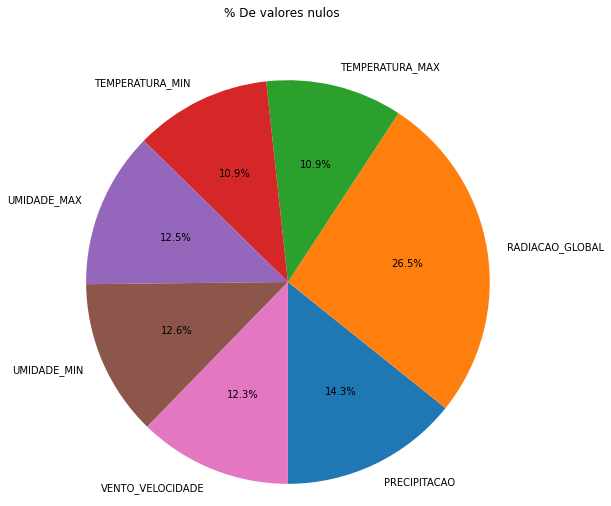

In [75]:
dados = dadosFull.isnull().sum(); 
# matplotlib-exemplo-41
# grafico de pizza
datax = np.array([dados.PRECIPITACAO, dados.RADIACAO_GLOBAL, dados.TEMPERATURA_MAX, dados.TEMPERATURA_MIN, dados.UMIDADE_MAX, dados.UMIDADE_MIN, dados.VENTO_VELOCIDADE])
labels = [ 'PRECIPITACAO', 'RADIACAO_GLOBAL', 'TEMPERATURA_MAX', 'TEMPERATURA_MIN','UMIDADE_MAX', 'UMIDADE_MIN', 'VENTO_VELOCIDADE']
explode = ( 0, 0, 0, 0, 0, 0, 0)
colrs=['cyan', 'tan', 'wheat','cyan', 'tan', 'wheat','cyan']
# graficos
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(datax, explode=explode, labels=labels, autopct='%1.1f%%',startangle=270)
ax.axis('equal') # mantenha um circulo
fig.suptitle("% De valores nulos");
#fig.savefig('data/pizza.png', dpi=125)
 


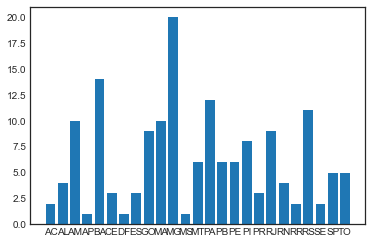

In [6]:
estacoesConvencionais = pd.read_csv("datasets/CatalogoEstacoesConvencionais.csv",";");  
estacoesAutomaticas   = pd.read_csv("datasets/CatalogoEstacoesAutomáticas.csv",";");  

estacoes_Conv_G = estacoesConvencionais.groupby(['SG_ESTADO'],as_index=False).agg({'DT_INICIO_OPERACAO':'count'});
estacoes_Auto_G = estacoesAutomaticas.groupby(['SG_ESTADO'],as_index=False).agg({'DT_INICIO_OPERACAO':'count'});

plt.style.use('seaborn-white')
x3 = np.array(estacoes_Conv_G.SG_ESTADO)
y3 = np.array(estacoes_Conv_G.DT_INICIO_OPERACAO )
plt.bar(x3,y3)
plt.show() # Try commenting this an run
#plt.scatter(x3,y3) # scatter plot
#plt.show()

In [7]:
estacoesConvencionais = pd.read_csv("datasets/CatalogoEstacoesConvencionais.csv",";");  
estacoesAutomaticas   = pd.read_csv("datasets/CatalogoEstacoesAutomáticas.csv",";");  


#print(estacaosConvencionais.groupby(['SG_ESTADO'],as_index=False).agg({'DT_INICIO_OPERACAO':'count'}))
#print(dadosFull.groupby(['NAME_FILE'],as_index=False).agg({'PRECIPITACAO':'sum'}))
 